## Импортируем модули

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Открываем базу

In [2]:
cnx = sqlite3.connect(r'../db/my_database.db')

## Получаем данные из таблицы. Создаем dataframe. 

In [20]:
fields_list = ["district", "rating_all", "rating_house", "rating_flat", "rating_infrastructure", "record_status"]
fields = ', '.join(fields_list)
where = f"record_status = 2"
sql = f"SELECT {fields} FROM avito WHERE {where}"
df = pd.read_sql_query(sql, cnx)

In [21]:
df.head()

,district,rating_all,rating_house,rating_flat,rating_infrastructure,record_status
0,Бежицкий,13.85,4.15,5,4.70,2
1,Бежицкий,6.99,2.73,3,1.26,2
2,Бежицкий,10.97,3.33,4,3.64,2
3,Бежицкий,8.60,3.36,3,2.24,2
4,Фокинский,7.31,3.51,3,0.80,2


In [22]:
df.isna().sum()

district                 0
rating_all               0
rating_house             0
rating_flat              0
rating_infrastructure    0
record_status            0
dtype: int64

In [23]:
df.describe()

,rating_all,rating_house,rating_flat,rating_infrastructure
count,52.000000,52.000000,52.000000,52.000000
mean,9.480192,3.605962,3.750000,2.124231
std,3.058930,0.907769,1.619429,1.346926
min,1.250000,1.130000,0.000000,0.000000
25%,8.855000,3.345000,3.000000,0.890000
50%,10.075000,3.720000,4.000000,2.240000
75%,11.427500,4.365000,5.000000,3.040000
max,13.850000,4.690000,6.000000,4.890000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district               52 non-null     object 
 1   rating_all             52 non-null     float64
 2   rating_house           52 non-null     float64
 3   rating_flat            52 non-null     int64  
 4   rating_infrastructure  52 non-null     float64
 5   record_status          52 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.6+ KB


## matplotlib - построение histogram

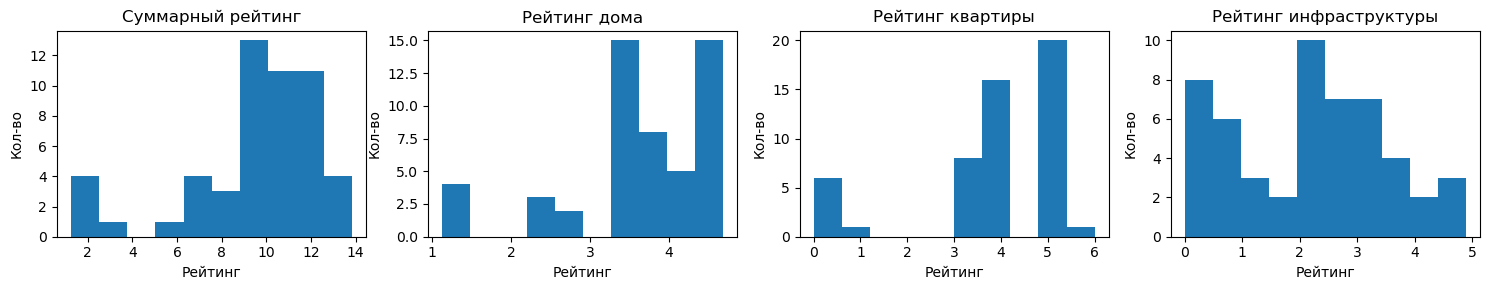

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))
ax1.hist(df["rating_all"])
ax1.title.set_text('Суммарный рейтинг')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Кол-во')

ax2.hist(df["rating_house"])
ax2.title.set_text('Рейтинг дома')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Кол-во')

ax3.hist(df["rating_flat"])
ax3.title.set_text('Рейтинг квартиры')
ax3.set_xlabel('Рейтинг')
ax3.set_ylabel('Кол-во')

ax4.hist(df["rating_infrastructure"])
ax4.title.set_text('Рейтинг инфраструктуры')
ax4.set_xlabel('Рейтинг')
ax4.set_ylabel('Кол-во')

plt.tight_layout()
# fig.suptitle("Графики распределения рейтингов")
fig.show()

## seaborn - построение histogram

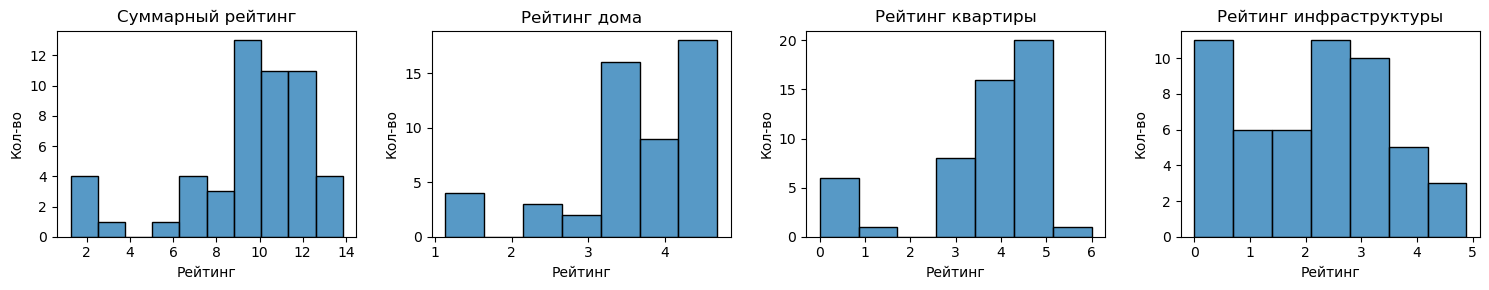

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))

# Plot on the first subplot
sns.histplot(data=df["rating_all"], ax=ax1)
ax1.title.set_text('Суммарный рейтинг')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Кол-во')

# Plot on the second subplot
sns.histplot(data=df["rating_house"], ax=ax2)
ax2.title.set_text('Рейтинг дома')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Кол-во')

# Plot on the third subplot
sns.histplot(data=df["rating_flat"], ax=ax3)
ax3.title.set_text('Рейтинг квартиры')
ax3.set_xlabel('Рейтинг')
ax3.set_ylabel('Кол-во')

sns.histplot(data=df["rating_infrastructure"], ax=ax4)
ax4.title.set_text('Рейтинг инфраструктуры')
ax4.set_xlabel('Рейтинг')
ax4.set_ylabel('Кол-во')

# Adjust the spacing between plots
plt.tight_layout()

# Display the plot
plt.show()

## Получение данных по среднему значению ТОП3 общего рейтинга по каждому району

In [54]:
districts = df[df['record_status'] == "2"].groupby("district").groups.keys()
filtered = df
ratings = ["rating_all", "rating_house", "rating_flat", "rating_infrastructure"]
data = {}
for rating in ratings:
    filtered['row_num'] = filtered.groupby('district')[rating].rank(method='first', ascending=False)
    top_3 = filtered[filtered['row_num'] <= 3]
    result = top_3.groupby('district', as_index=False)[rating].mean().round(2)
    data.setdefault(rating, result)

## Построение графиков

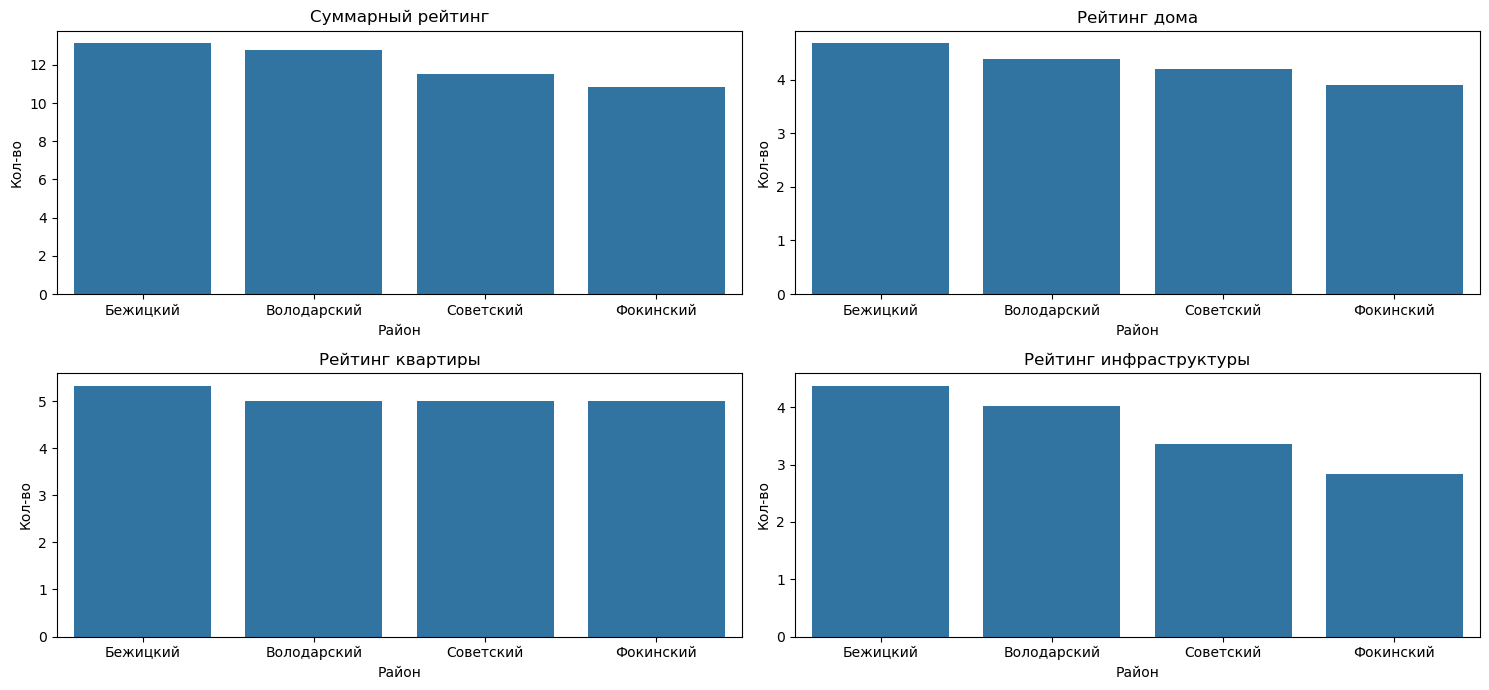

In [55]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(15, 7))

# Plot on the first subplot
sns.barplot(x = data["rating_all"]["district"], y = data["rating_all"]["rating_all"], ax=ax1)
ax1.title.set_text('Суммарный рейтинг')
ax1.set_xlabel('Район')
ax1.set_ylabel('Кол-во')

# Plot on the second subplot
sns.barplot(x = data["rating_house"]["district"], y = data["rating_house"]["rating_house"], ax=ax2)
ax2.title.set_text('Рейтинг дома')
ax2.set_xlabel('Район')
ax2.set_ylabel('Кол-во')

# Plot on the third subplot
sns.barplot(x = data["rating_flat"]["district"], y = data["rating_flat"]["rating_flat"], ax=ax3)
ax3.title.set_text('Рейтинг квартиры')
ax3.set_xlabel('Район')
ax3.set_ylabel('Кол-во')

sns.barplot(x = data["rating_infrastructure"]["district"], y = data["rating_infrastructure"]["rating_infrastructure"], ax=ax4)
ax4.title.set_text('Рейтинг инфраструктуры')
ax4.set_xlabel('Район')
ax4.set_ylabel('Кол-во')

# Adjust the spacing between plots
plt.tight_layout()

# Display the plot
plt.show()